In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv("Advertising.csv")

In [ ]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X = df.drop('sales',axis=1)
Y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)


In [ ]:
poly_features = poly_converter.fit_transform(X)

In [ ]:
poly_features.shape

(200, 9)

In [ ]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [ ]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [ ]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression(fit_intercept=True)

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(Y_test,test_predictions)
MSE = mean_squared_error(Y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [ ]:
MAE

0.4842810535215478

In [ ]:
MSE

0.4202814842156843

In [ ]:
RMSE

0.6482912032533561

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(poly_features,Y)

LinearRegression()

In [ ]:
final_model.coef_

array([ 5.16525487e-02,  2.10742970e-02,  6.88373531e-03, -1.09702663e-04,
        1.10525949e-03, -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
        1.19125650e-05])

In [ ]:
final_model.intercept_

5.084781667166672

In [ ]:
y_hat = final_model.predict(poly_features)

In [ ]:
y_hat

array([21.75653244, 10.49006203,  8.75953072, 18.60895946, 13.25055976,
        8.15115465, 10.75890441, 12.80519827,  5.5922687 , 11.61838919,
        8.68179159, 17.37976678,  8.67815936, 10.08642683, 19.33310101,
       22.68643108, 12.67922006, 24.1486293 , 10.28415525, 14.81713812,
       18.48220076, 12.53729122,  6.74897747, 15.76467294,  9.12500081,
       12.08518549, 15.60426147, 15.92255869, 19.20659542, 10.02255592,
       20.49479569, 12.23050394,  9.35019625, 17.4012628 ,  9.22124117,
       12.18499002, 25.10682987, 14.09476449,  9.28655267, 21.61294763,
       16.5590721 , 18.23261246, 20.44445003, 13.14115942,  8.00361731,
       15.68717027, 10.18084631, 23.22677131, 15.40826561,  9.36935981,
       11.72326053, 10.45414681, 22.21014243, 21.57696171, 20.10534626,
       23.35052372,  6.75115377, 13.46202822, 24.04467393, 18.68538207,
        7.79925047, 24.48206229, 15.55073576, 13.35421087, 17.41847322,
        9.04550611,  8.06217513, 12.73184831, 19.02762624, 22.81

In [ ]:
residuals = Y-y_hat

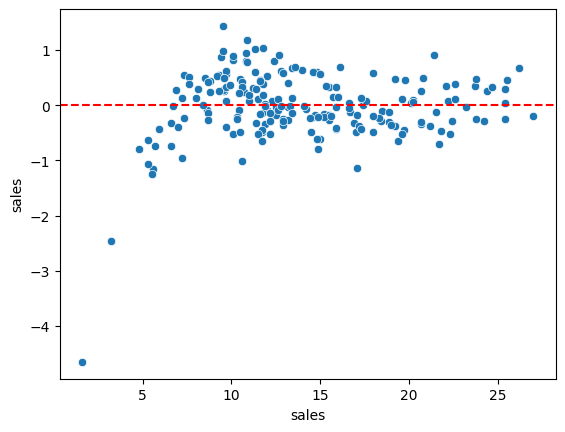

In [ ]:
sns.scatterplot(x=Y,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')

In [ ]:
from joblib import dump,load

In [ ]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [ ]:
loaded_model = load('sales_model.joblib')

In [ ]:
loaded_model.predict([[149,22,12]])

ValueError: X has 3 features, but LinearRegression is expecting 9 features as input.

In [ ]:
train_rms_error = []
test_rms_error = []

for d in range(1,10):

  poly_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.33, random_state=101)

  model=LinearRegression(fit_intercept=True)
  model.fit(X_train,Y_train)

  train_predictions = model.predict(X_train)
  test_predictions = model.predict(X_test)

  train_rms_error.append(np.sqrt(mean_squared_error(Y_train,train_predictions)))
  test_rms_error.append(np.sqrt(mean_squared_error(Y_test,test_predictions)))


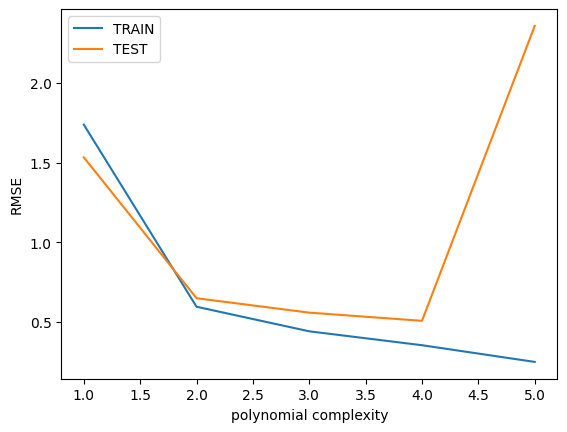

In [ ]:
plt.plot(range(1,6),train_rms_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rms_error[:5],label='TEST')
plt.xlabel('polynomial complexity')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
poly_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(poly_features,Y)

LinearRegression()

In [ ]:
#saving the model

from joblib import dump,load
dump(final_model,'loaded_model.joblib')

['loaded_model.joblib']

In [ ]:
dump(poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [ ]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('loaded_model.joblib')

In [ ]:
campaign_poly=loaded_poly.transform([[149,22,12]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])